In [1]:
#Importing libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import matplotlib.dates as mdates
import csv
from datetime import datetime

In [2]:
##Handy tool to deal with utf-8 encoding problems
import chardet
import pandas as pd
with open('Superstore.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df = pd.read_csv('Superstore.csv', encoding=result['encoding'])
#Explore what df looks like
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#Forecasting only furniture sales
furniture =df.loc[df['Category'] == 'Furniture']

In [4]:
furniture['Order Date'].head()

0      11/8/16
1      11/8/16
3     10/11/15
5       6/9/14
10      6/9/14
Name: Order Date, dtype: object

In [5]:
furniture.shape
#Shows 21 columns and 2121 rows

(2121, 21)

In [6]:
#to get order date column in correct format
import datetime
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])

In [7]:
#Preprocessing data to remove uncessary columns
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)  #Dropping unecessary columns
furniture = furniture.sort_values('Order Date')  #Sorting values by Order date
furniture.isnull().sum()


Order Date    0
Sales         0
dtype: int64

In [8]:
furniture['Sales'].min(), furniture['Sales'].max()
#Lowest sale is 1,892 and Highest sale is 4416.17

(1.892, 4416.174)

In [9]:
#Convert the dataframe index to a datetime index
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [10]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [11]:
#Using start of each month as a timestamp
y = furniture['Sales'].resample('MS').mean()

In [12]:
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

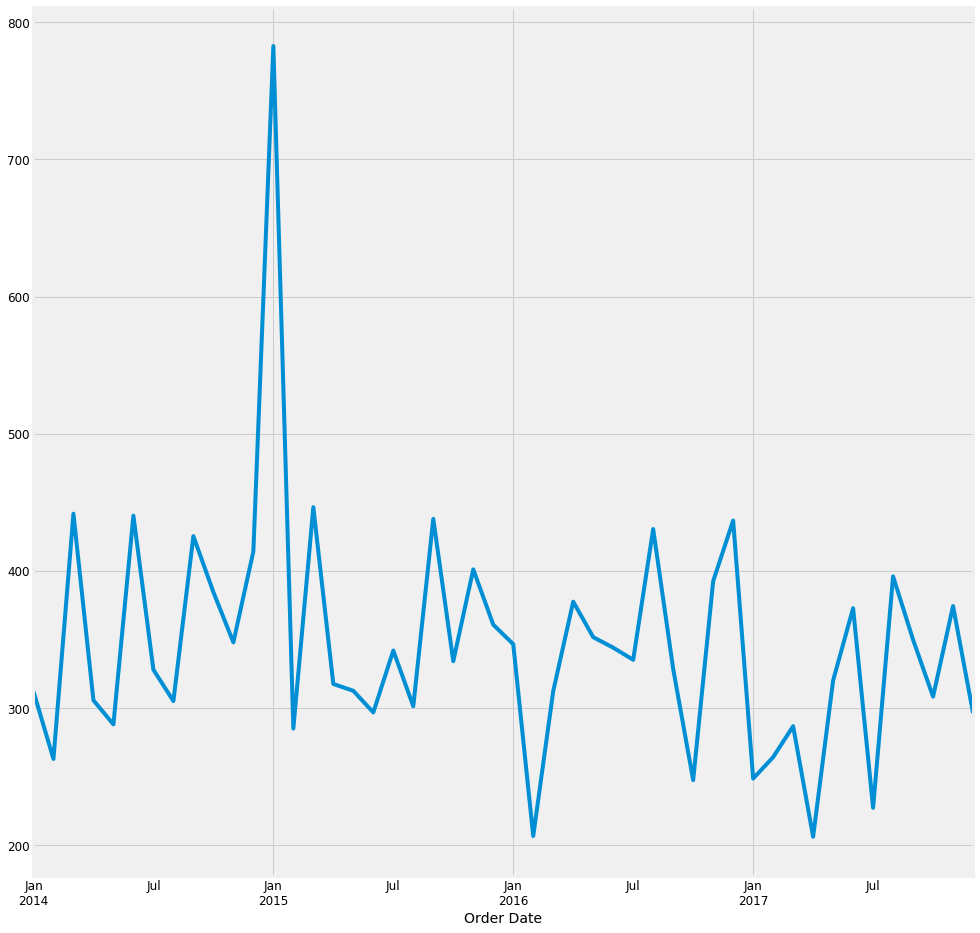

In [13]:
#Visualization of time series
y.plot(figsize=(15,16))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

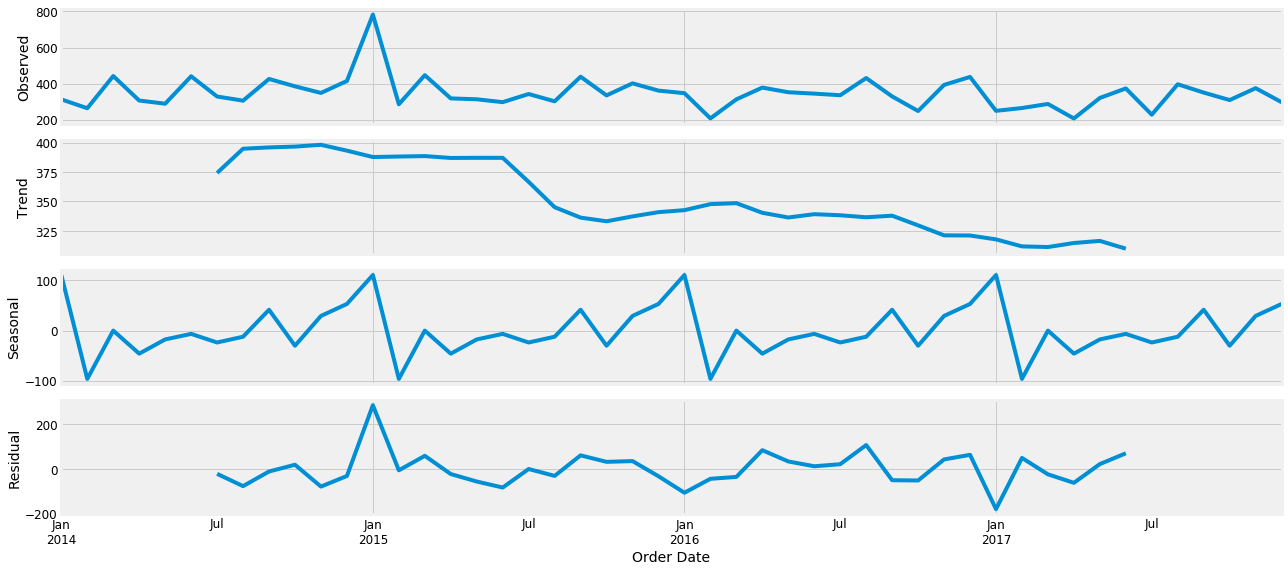

In [14]:
##Visualization using a method called time-series decomposition.  Allows us to decompose our time series into three distinct components
#3 components Trend, Seasonality, and NOise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show

# ARIMA Time Series Forecasting tool

In [15]:
#ARIMA useful for time series forecasting.  Account for seasonality, trend, and noise in data.
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
#Goal is to use grid search to find optimal parameters for best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1410.9798459918788
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.2046489858545


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1409.9053389787357
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666301
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364605


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.12205434854536
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2601.2287430950046
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662501456
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269677105


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1502.2092596364587
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.35521367049097
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:405.2070998803233
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476944
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:538.896472144719


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2517.1943481359335
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.8726989905126
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:419.18397927249293
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:374.2066963539494
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:273.4032454636303
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:592.7661498749849


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1299.231894154879
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.7241159738327
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:420.4114538992034


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1508.063695056437
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:273.58403955659355


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2719417804127
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3062.543592242044
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:418.5261783089129
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:422.40035833220134
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3189.3297874289933
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:275.47757405307993
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:566.5211872508684


/Users/johnvictorifermo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1203.1381113384537
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:430.3305770817939
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:397.366898165164
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:398.18255772372464
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:273.44153987929303
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:540.6257368397355
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:414.77261730417655
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:391.83032556403043
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:375.5835511419406
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:263.93710843812755


In [17]:
# Fitting Arima model using best model, which is suggest ARIMA(1, 1, 1)x(1, 1, 0, 12)12  as it yields lowest AIC:263.937
#Understand results better
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9742   6.86e-05   9.22e+07      0.000    6323.974    6323.974


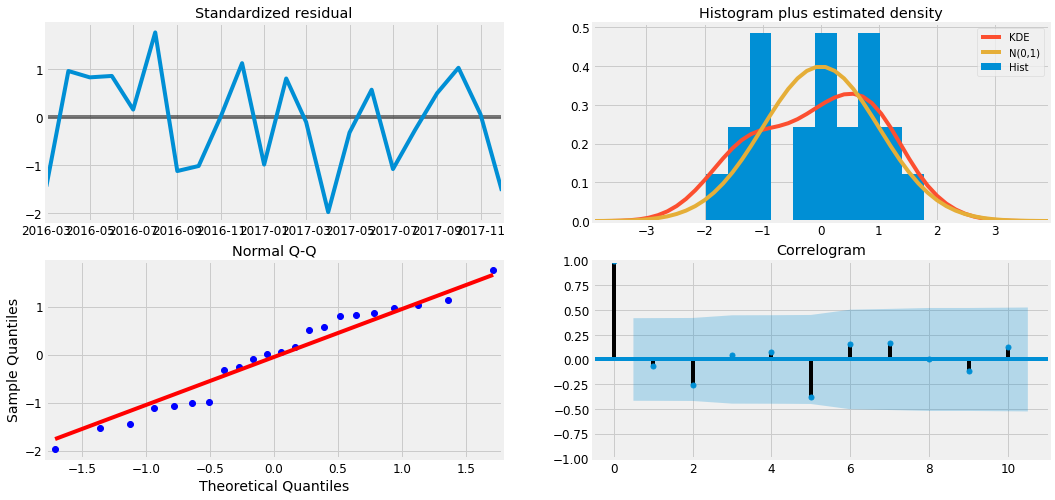

In [18]:
#Running model diagnosits to investigate unusual behavior
#Shows near normally distributed
results.plot_diagnostics(figsize=(16, 8))
plt.show()

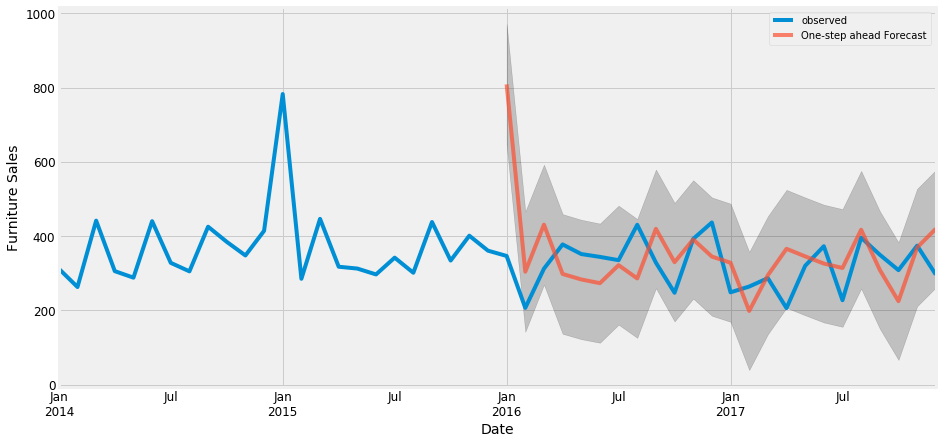

In [19]:
#Validating forecasts
#To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, 
#and we set forecasts to start at 2017–01–01 to the end of the data#.
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [20]:
y_forcasted=pred.predicted_mean
y_truth=y['2017-01-01':]

mse =((y_forcasted-y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 5911.26


Pretty high mean squared errror.  Not close to 0.

In [21]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.88


# Mean Squared Error
MSE is an estimator measures the average of the squares of the errors.   That is the average squared difference between the estimated values and what is estimated.
MSE is a measure of the quality of an estimator.
Smaller the MESE the closer we are finding to finding the line of best fit.
# Root Mean Square Error
RMSE tells us our model was able to forecast the average result within a ertain number of real result.
So the average daily furniture sales in this test set is within 76.88.   Pretty close

In [22]:
#Fixes issue with float() argument must be a string or a number, not 'Period'**
pd.plotting.register_matplotlib_converters()

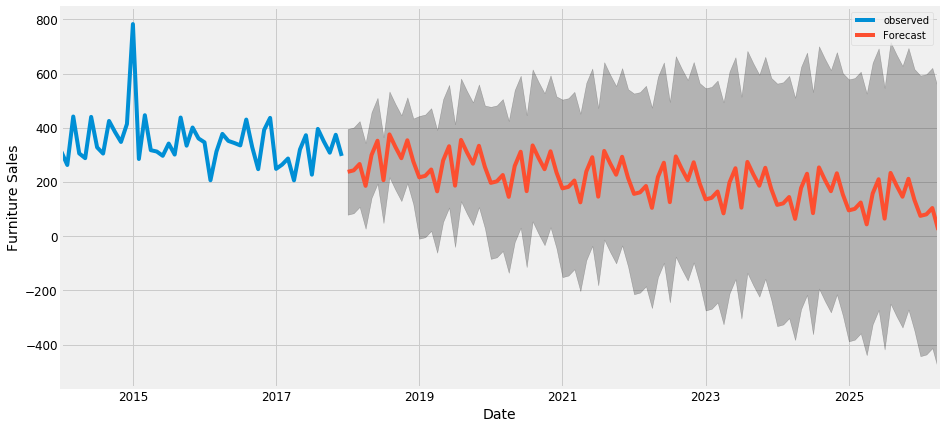

In [23]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Comparing time series of Furniture vs Office supplies

In [24]:
furniture = df.loc[df['Category']== 'Furniture']
office = df.loc[df['Category']=='Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

As you can see from this there are 2121 furniture sales compared to 6026 office sales

In [25]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [26]:
#Conver 'Order Date' to datetime
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])

In [27]:
#Sorting the values by datetime
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()


In [28]:
office.head()

,Order Date,Sales
0,1/1/17,506.338
1,1/10/14,2.890
2,1/11/16,78.864
3,1/12/15,475.548
4,1/12/17,810.840


In [29]:
#Set index for furniture and office
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [30]:
furniture.dtypes

Sales    float64
dtype: object

In [31]:
#Change index to datetime index
furniture.index = pd.to_datetime(furniture.index)
office.index = pd.to_datetime(office.index)

In [34]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049187,324.346545


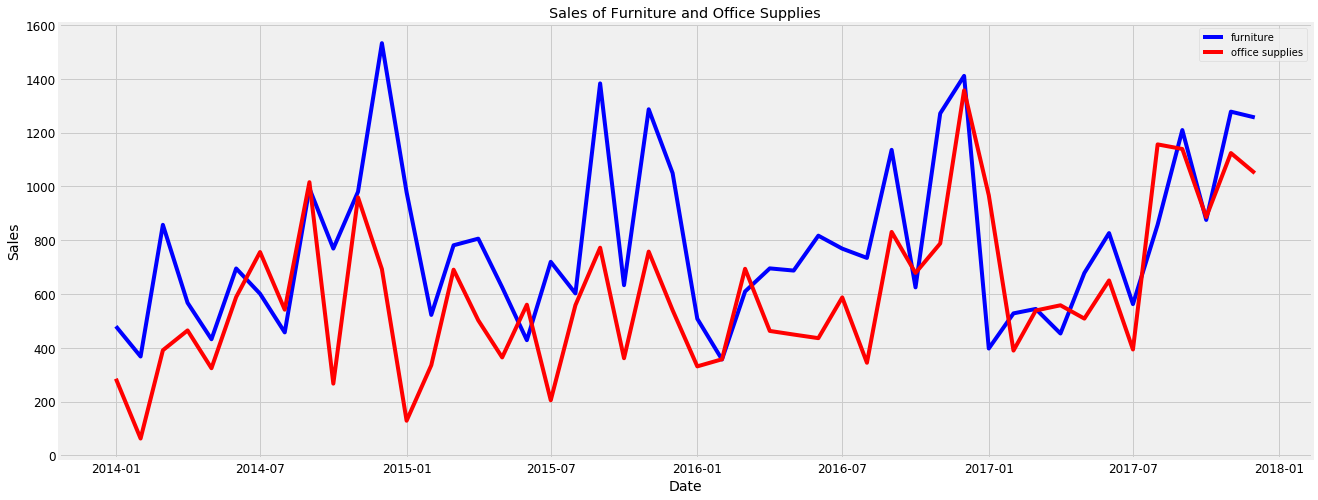

In [35]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

pred_ci.head()

Sales of furniture and office supplies share similiar pattern but overwhelmingly furniture sales seem better

In [36]:
#Finding out when was the first time office supplies sales surpasses furniture sales
#Understand ix and what it does seems to be selecting scertain things for a certain level
first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


#  Time Series Modeling with Prophet
Forecasting tool using prophet, designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily.  Has advanced capabilities for modelign the effects of holidays on a time-series and implementing custom changepoints.

In [38]:
furniture.head()

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049187


In [60]:
#Fixed problem with must be a string or a number, not 'datetime.datetime'
pd.plotting.register_matplotlib_converters()

<Figure size 1296x432 with 0 Axes>

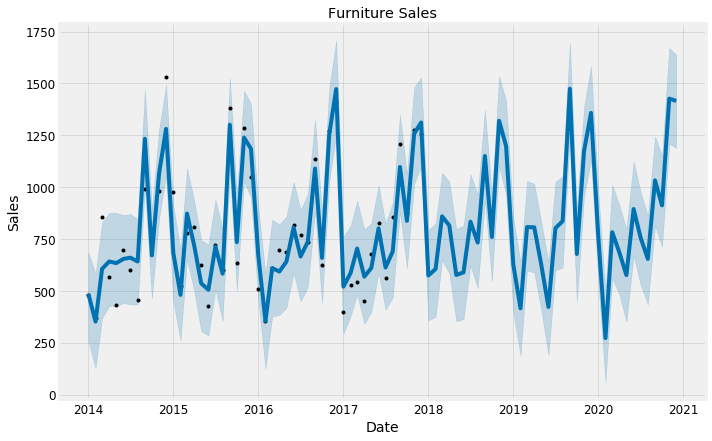

In [61]:
from fbprophet import Prophet #Importing 
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95,weekly_seasonality=True, daily_seasonality=True)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95,weekly_seasonality=True, daily_seasonality=True)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [62]:
#Inspecting what profit does look at all the additional columns
furniture_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,41.773106,256.300547,685.493626,41.773106,41.773106,443.678602,443.678602,443.678602,693.948414,...,-5.172537,-5.172537,-5.172537,-245.097275,-245.097275,-245.097275,0.0,0.0,0.0,485.451708
1,2014-02-01,42.990906,126.579048,582.829975,42.990906,42.990906,308.828558,308.828558,308.828558,693.948414,...,-114.105241,-114.105241,-114.105241,-271.014614,-271.014614,-271.014614,0.0,0.0,0.0,351.819465
2,2014-03-01,44.090855,367.773452,830.352046,44.090855,44.090855,561.849224,561.849224,561.849224,693.948414,...,-114.105241,-114.105241,-114.105241,-17.993949,-17.993949,-17.993949,0.0,0.0,0.0,605.940078
3,2014-04-01,45.308655,428.284025,875.460703,45.308655,45.308655,596.185449,596.185449,596.185449,693.948414,...,-32.895130,-32.895130,-32.895130,-64.867835,-64.867835,-64.867835,0.0,0.0,0.0,641.494103
4,2014-05-01,46.487171,425.275372,875.562412,46.487171,46.487171,587.347802,587.347802,587.347802,693.948414,...,81.737187,81.737187,81.737187,-188.337799,-188.337799,-188.337799,0.0,0.0,0.0,633.834973


# Comparing forecast methods.   
Now joining them together to compare their future forecasts

In [63]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_daily,...,office_weekly,office_weekly_lower,office_weekly_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,41.773106,256.300547,685.493626,41.773106,41.773106,443.678602,443.678602,443.678602,693.948414,...,-39.237632,-39.237632,-39.237632,-102.135258,-102.135258,-102.135258,0.0,0.0,0.0,319.859402
1,2014-02-01,42.990906,126.579048,582.829975,42.990906,42.990906,308.828558,308.828558,308.828558,693.948414,...,-68.646180,-68.646180,-68.646180,-331.084052,-331.084052,-331.084052,0.0,0.0,0.0,69.186655
2,2014-03-01,44.090855,367.773452,830.352046,44.090855,44.090855,561.849224,561.849224,561.849224,693.948414,...,-68.646180,-68.646180,-68.646180,-16.768860,-16.768860,-16.768860,0.0,0.0,0.0,390.442773
3,2014-04-01,45.308655,428.284025,875.460703,45.308655,45.308655,596.185449,596.185449,596.185449,693.948414,...,186.959778,186.959778,186.959778,-141.812880,-141.812880,-141.812880,0.0,0.0,0.0,528.689306
4,2014-05-01,46.487171,425.275372,875.562412,46.487171,46.487171,587.347802,587.347802,587.347802,693.948414,...,-75.063755,-75.063755,-75.063755,-215.027622,-215.027622,-215.027622,0.0,0.0,0.0,200.887736


# Trend and Forecast Visualization

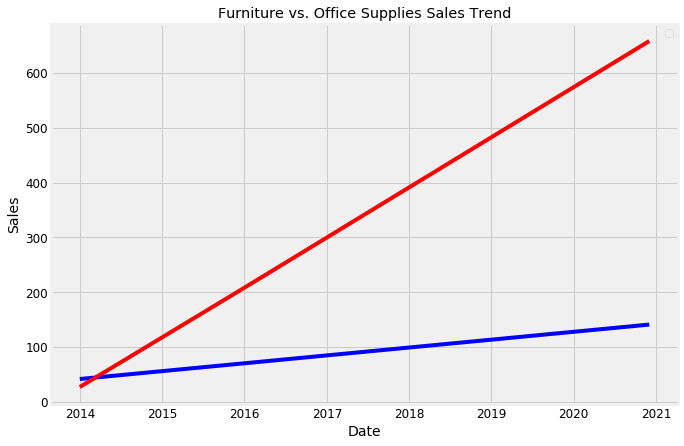

In [64]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

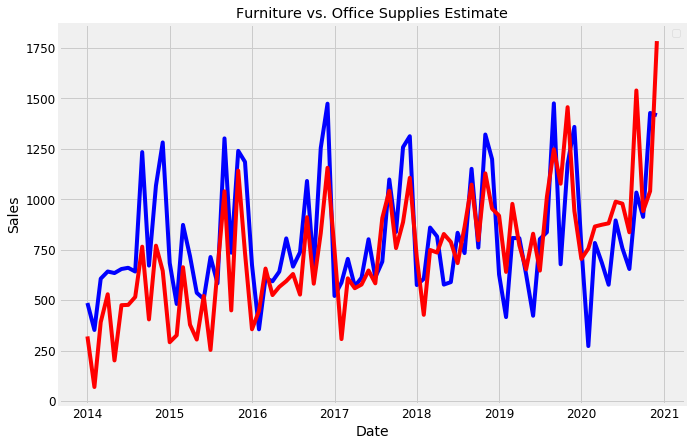

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

# Trends and Patterns
We can use the Prophet models to inspect different trends of these two categories

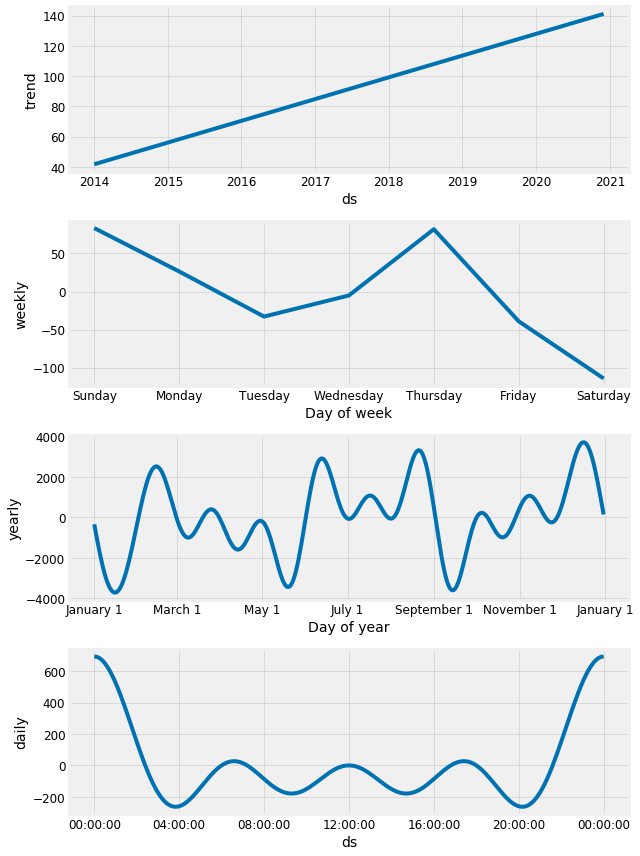

In [66]:
furniture_model.plot_components(furniture_forecast);

From initial analysis you can see sales seem to be highest before january 1 could be due to Christmas and Thursday optimal time for sales

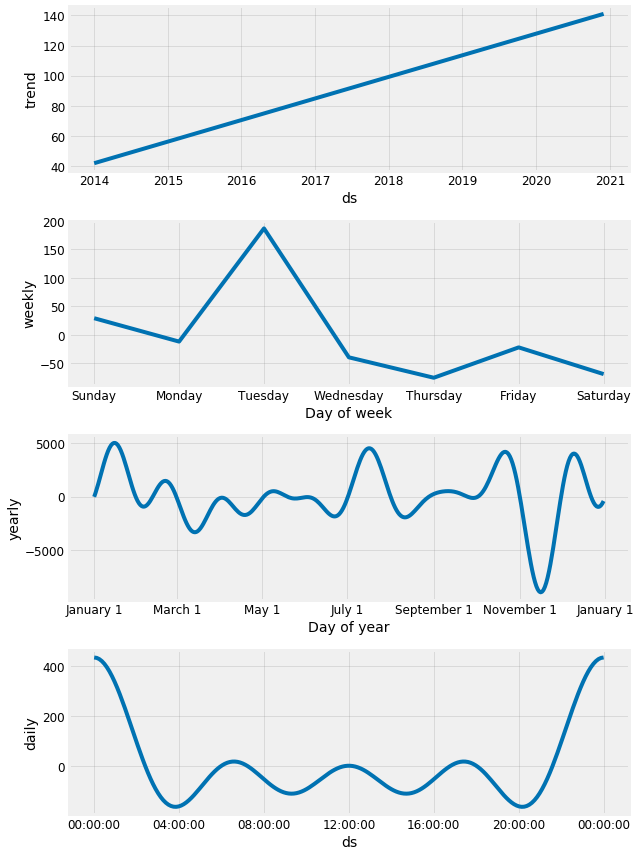

In [67]:
office_model.plot_components(furniture_forecast);

Thank you digital ocean and susan Li for helping understand things better
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
https://www.digitalocean.com/community/tutorial_series/time-series-visualization-and-forecasting    

In [70]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [72]:
df['City'].value_counts()
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [81]:
!python --version

Python 3.7.3


In [93]:
rows = (1, 2, 5, 6)
rows[0], rows[3]
len(rows)
          

4

In [88]:
say_hi("Willie", 32)

My name is Willie and I'm 32 years old


In [94]:
def easy_unpack(elements):
    if len(elements)>4:
        finished= (elements[0], elements[2], elements[6])
    elif len(elements)==4:
        finished=(elements[0], elements[1], elements[2])
    elif len(elements)==3:
        finished =(elements[0], elements[2], elements[1])
    return finished

In [100]:
elements = (3,2,1,4,5,6,7,7)

In [101]:
easy_unpack(elements)

(3, 1, 7)